## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# ReCell Project

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [2]:
# loading data
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


<IPython.core.display.Javascript object>

**Observations**

- The data cover a variety of brands like Oppo, Sony, LG, etc.
- A high percentage of devices seem to be running on Android.
- There are a few missing values in the data.

In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

- `brand_name`, `os`, `4g`, and `5g` are *object* type columns while the rest are numeric in nature.

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [8]:
# checking for missing values in the data
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

- As noted before, there are a few missing values in the data.

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

**Observations**

- There are 33 brands in the data and a category *Others* too.
- Android is the most common OS for the used devices.
- The weight ranges from 69g to 855g.
    - This does not seem incorrect as the data contains feature phones and tablets too.
- There are a few unusually low values for the internal memory and RAM of used devices, but those are likely due to the presence of feature phones in the data.
- The average value of the price of a used device is approx. 2/5 times the price of a new model of the same device.

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**`used_price`**

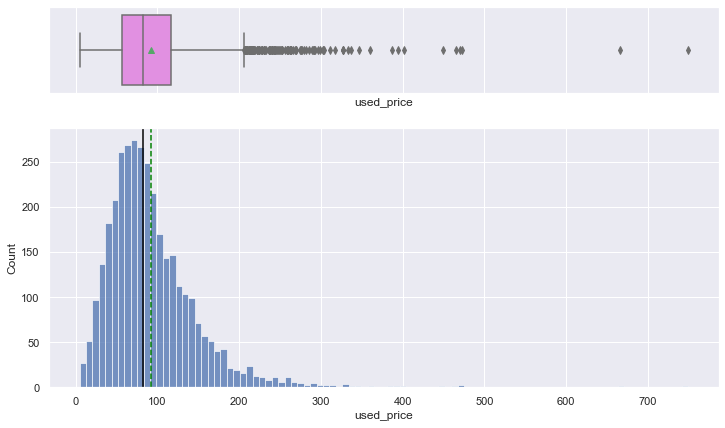

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "used_price")

**Observations**

- The distribution of used device prices is heavily right-skewed, with a mean value of ~100 euros.
- Let's apply the log transform to see if we can make the distribution closer to normal.

In [12]:
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

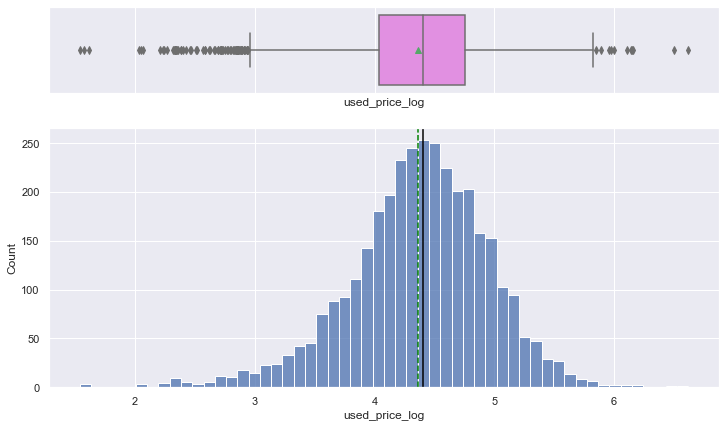

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "used_price_log")

- The used device prices are almost normally distributed now.

**`new_price`**

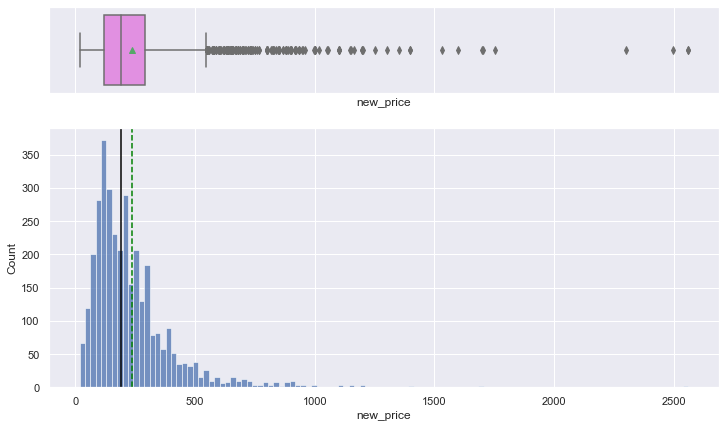

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "new_price")

**Observations**

- The distribution is heavily right-skewed, with a mean value of ~240 euros.
- Let's apply the log transform to see if we can make the distribution closer to normal.

In [15]:
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

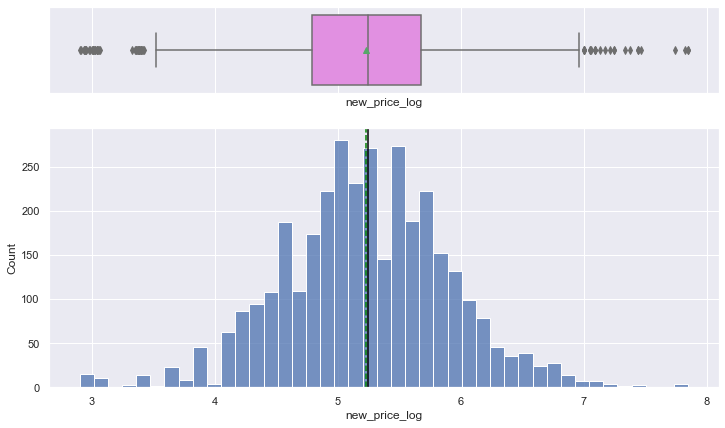

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "new_price_log")

- The prices of new device models are almost normally distributed now.

**`screen_size`**

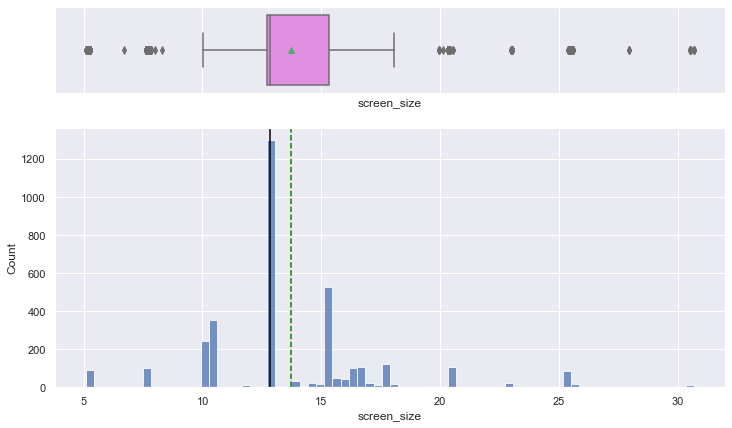

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "screen_size")

- Around 50% of the devices have a screen larger than 13cm.

**`main_camera_mp`**

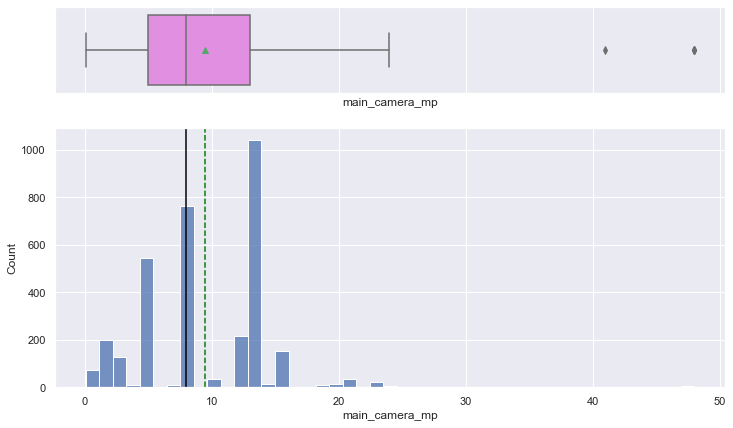

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "main_camera_mp")

- Few devices offer rear cameras with more than 20MP resolution.

**`selfie_camera_mp`**

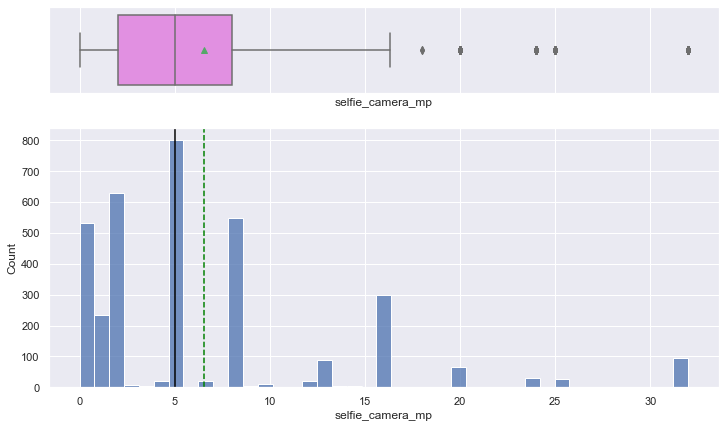

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

- Some devices do not provide a front camera, while few devices offer ones with more than 16MP resolution.

**`int_memory`**

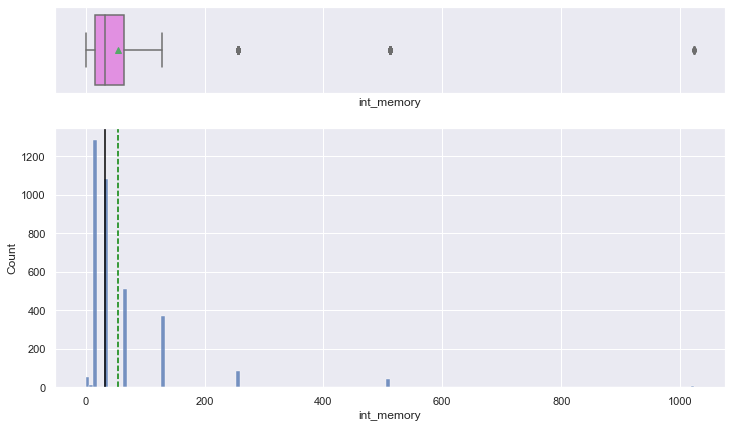

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "int_memory")

- Few devices offer more than 256GB internal memory.

**`ram`**

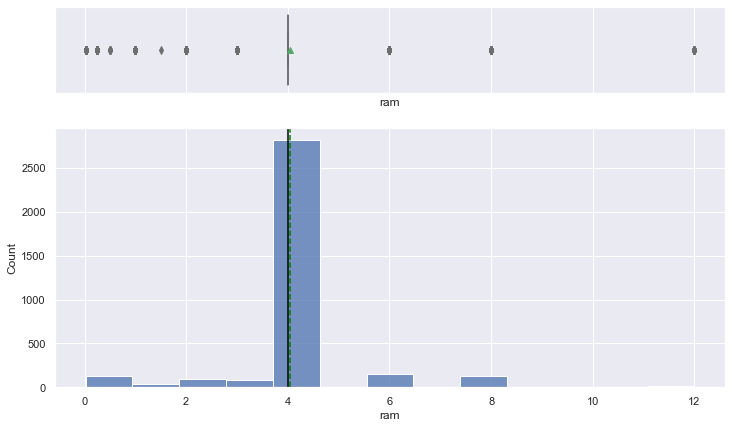

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "ram")

- Most of the devices offer 4GB RAM and very few offer greater than 8GB RAM.

**`weight`**

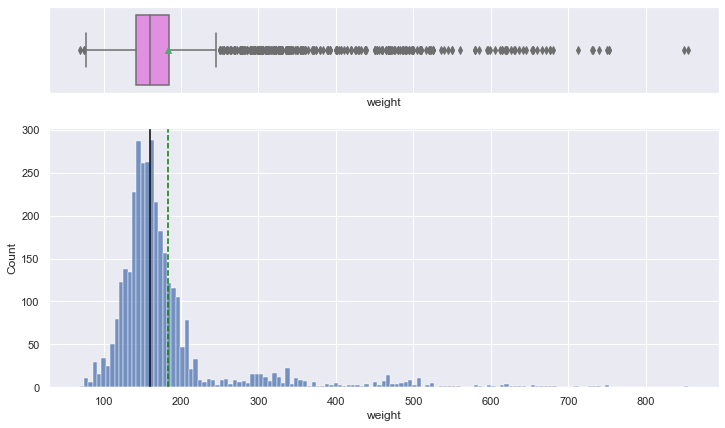

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "weight")

- The distribution of weight is right-skewed and has many upper outliers.
- Let's apply the log transform to see if we can make the distribution closer to normal.

In [23]:
df["weight_log"] = np.log(df["weight"])

<IPython.core.display.Javascript object>

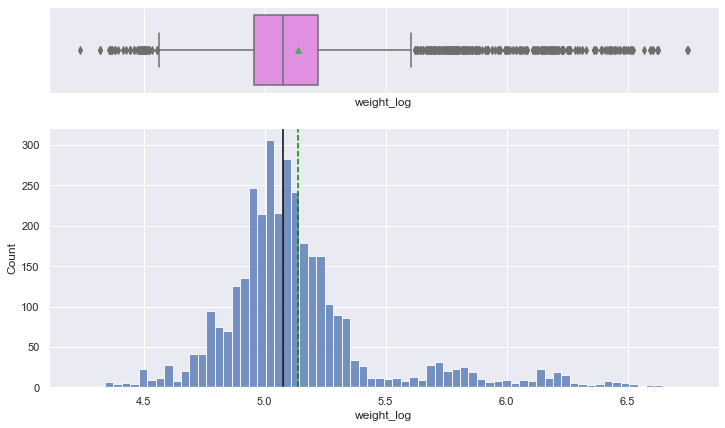

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "weight_log")

- The distribution is closer to normal now, but there are still a lot of upper outliers.

**`battery`**

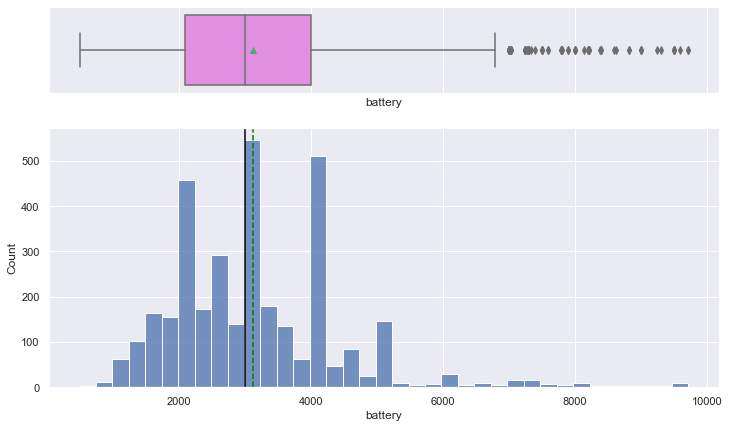

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "battery")

- The distribution of energy capacity of battery is close to normally distributed with a few upper outliers.

**`days_used`**

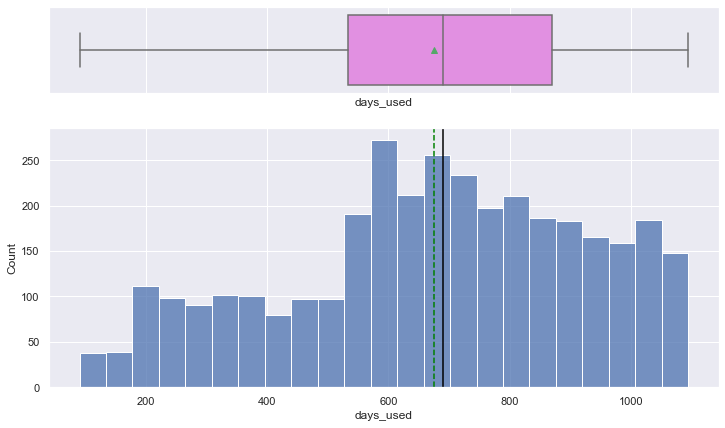

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "days_used")

- Around 50% of the devices in the data have been used for more than 700 days.

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`brand_name`**

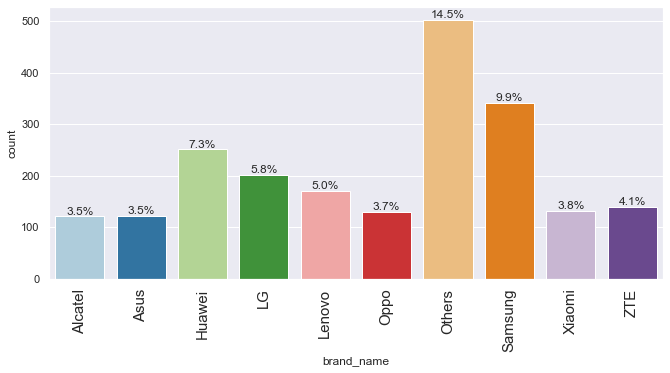

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations**

- Samsung has the most number of devices in the data, followed by Huawei and LG.
- 14.5% of the devices in the data are from brands other than the listed ones.

**`os`**

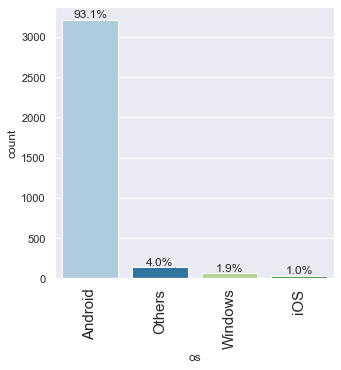

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "os", perc=True)

- Android devices dominate ~93% of the used device market.

**`4g`**

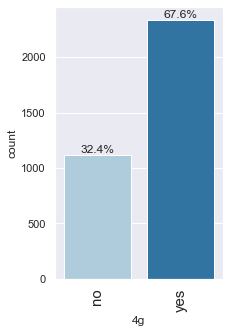

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "4g", perc=True)

- Nearly two-thirds of the devices in this data have 4G available.

**`5g`**

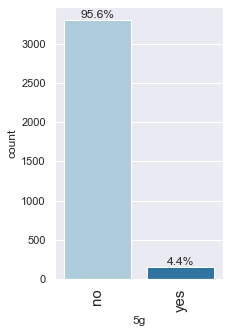

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "5g", perc=True)

- Only a handful of devices in this data provide 5G network.

**`release_year`**

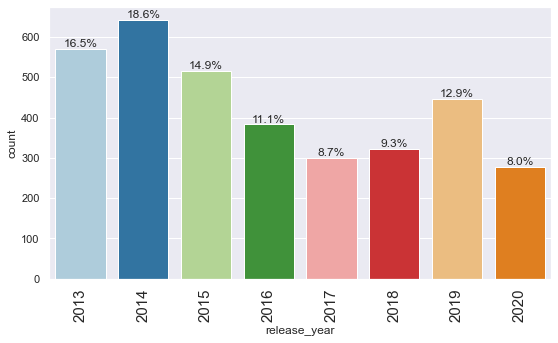

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "release_year", perc=True)

- Around 50% of the devices in the data were originally released in 2015 or before.

### Bivariate Analysis

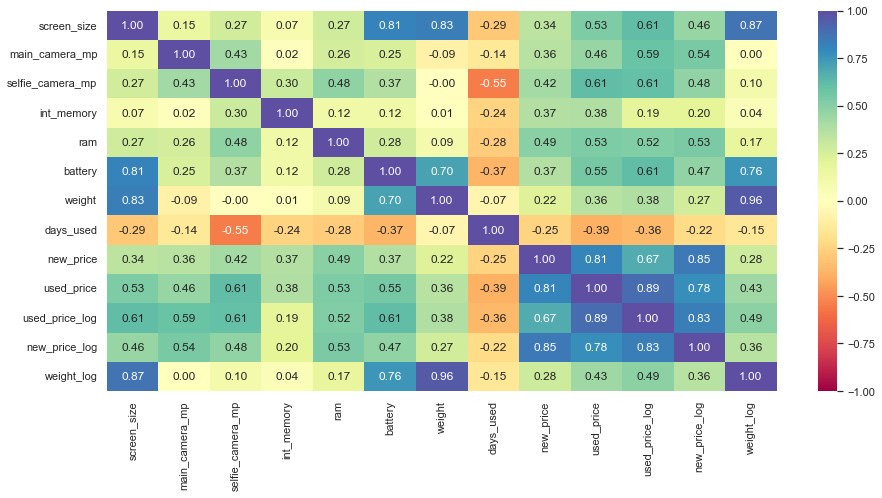

<IPython.core.display.Javascript object>

In [33]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- The used device price is highly correlated with the price of a new device model.
    - This makes sense as the price of a new model is likely to affect the used device price.
- Weight, screen size, and battery capacity of a device show a good amount of correlation.
    - This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight.
- The number of days a device is used is negatively correlated with the resolution of its front camera.
    - This makes sense as older devices did not offer as powerful front cameras as the recent ones.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

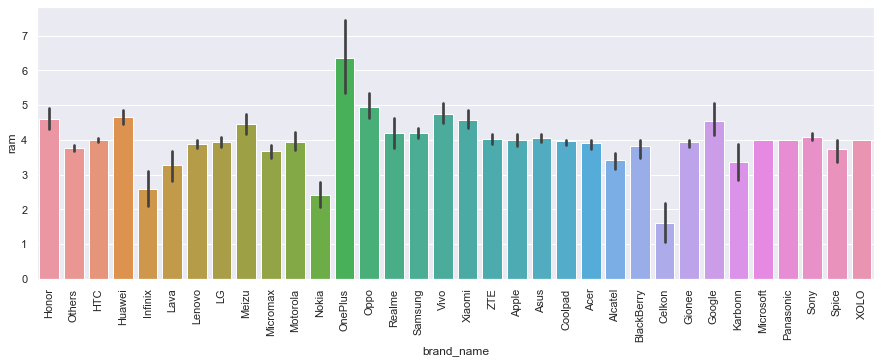

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Most of the companies offer around 4GB of RAM on average.
- OnePlus offers the highest amount of RAM in general, while Celkon offers the least.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [35]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 18)

<IPython.core.display.Javascript object>

In [36]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

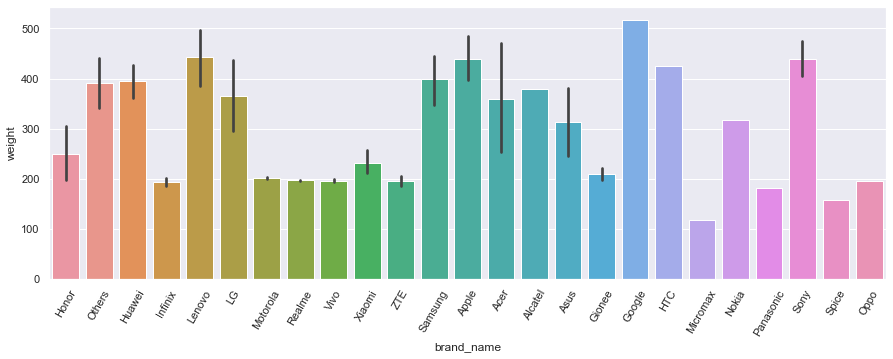

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

**Observations**

- A lot of brands offer devices which are not very heavy but have a large battery capacity.
- Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
- Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavy.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [38]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 18)

<IPython.core.display.Javascript object>

In [39]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

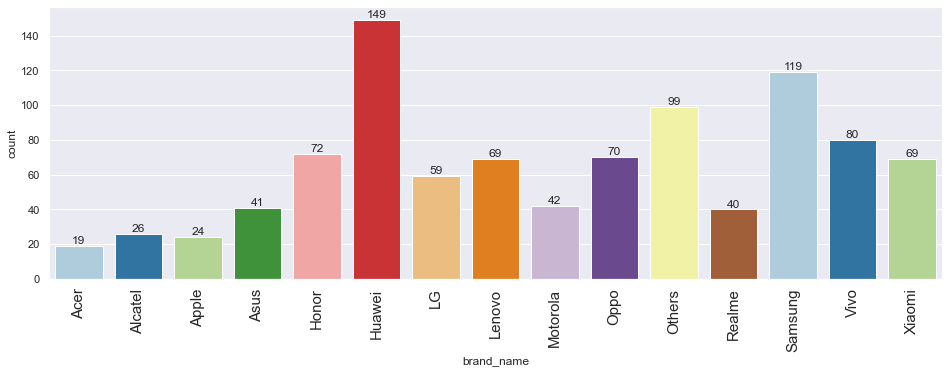

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df_large_screen, "brand_name", n=15)

**Observations**

- Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.
- Brands like Alcatel, Acer, and Apple offer fewer devices for this customer segment.

## Data Preprocessing

### Feature Engineering

- Let's create a new column `device_category` from the `new_price` column to tag phones and tablets as budget, mid-ranger, or premium.

In [41]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

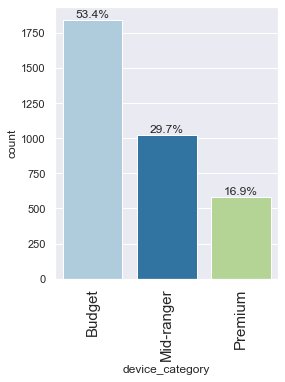

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df, "device_category", perc=True)

- More than half the devices in the data are budget devices.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [43]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 19)

<IPython.core.display.Javascript object>

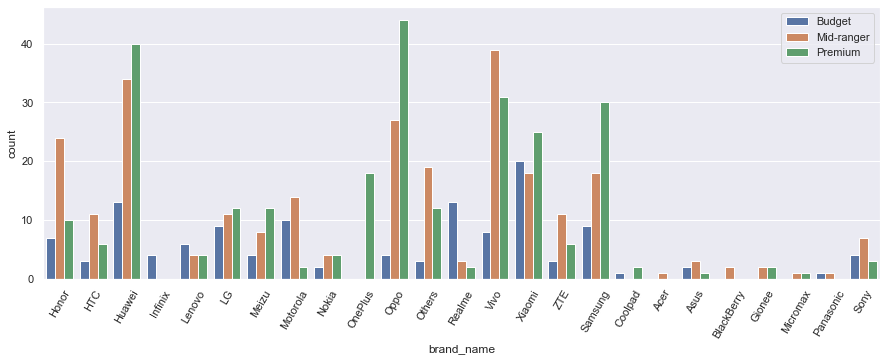

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Observations**

- Huawei is the go-to brand for this customer segment as they offer many devices across different price ranges with powerful front cameras.
- Xiaomi and Realme also offer a lot of budget devices capable of shooting crisp selfies.
- Oppo and Vivo offer many mid-rangers with great selfie cameras.
- Oppo, Vivo, and Samsung offer many premium devices for this customer segment.

**Let's do a similar analysis for rear cameras.**

In [45]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 19)

<IPython.core.display.Javascript object>

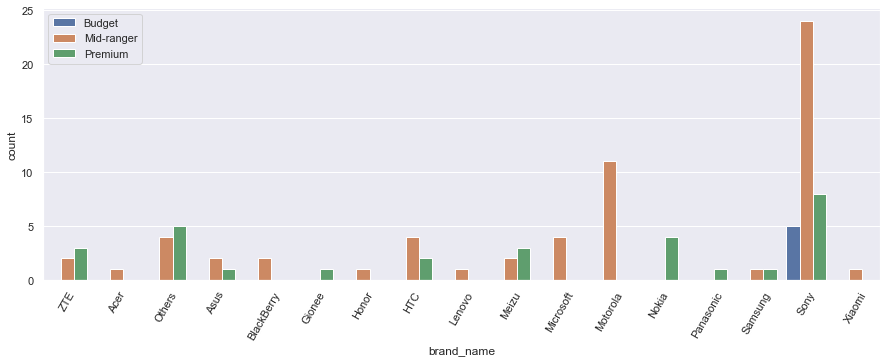

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=2)
plt.show()

**Observations**

- Sony is the go-to brand for great rear cameras as they offer many devices across different price ranges.
- No brand other than Sony seems to be offering great rear cameras in budget devices.
- Brands like Motorola and HTC offer mid-rangers with great rear cameras.
- Nokia offers a few premium devices with great rear cameras.

**Let's see how the price of used devices varies across the years.**

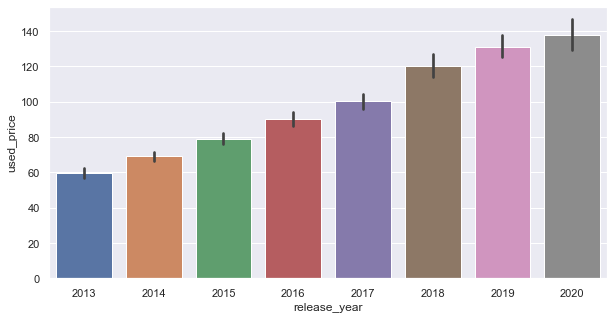

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price")
plt.show()

- The price of used devices has increased over the years.

**Let's check the distribution of 4G and 5G phones and tablets wrt price segments.**

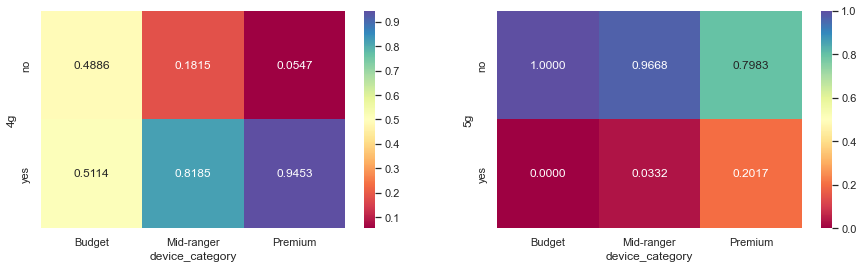

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

**Observations**

- There is an almost equal number of 4G and non-4G budget devices, but there are no budget devices offering 5G network.
- Most of the mid-rangers and premium devices offer 4G network.
- Very few mid-rangers (~3%) and around 20% of the premium devices offer 5G network.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [49]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [50]:
# checking for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
weight_log            7
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [51]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [52]:
# checking for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
weight_log            7
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [53]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [54]:
# checking for missing values
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
weight_log           7
device_category      0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.
- We will re-apply the log-transform to the `weight` column.

In [55]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1["weight_log"] = np.log(df1["weight"])

# checking for missing values
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
weight_log          0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

- All missing values have been imputed.

### Outlier Check

- Let's check for outliers in the data.

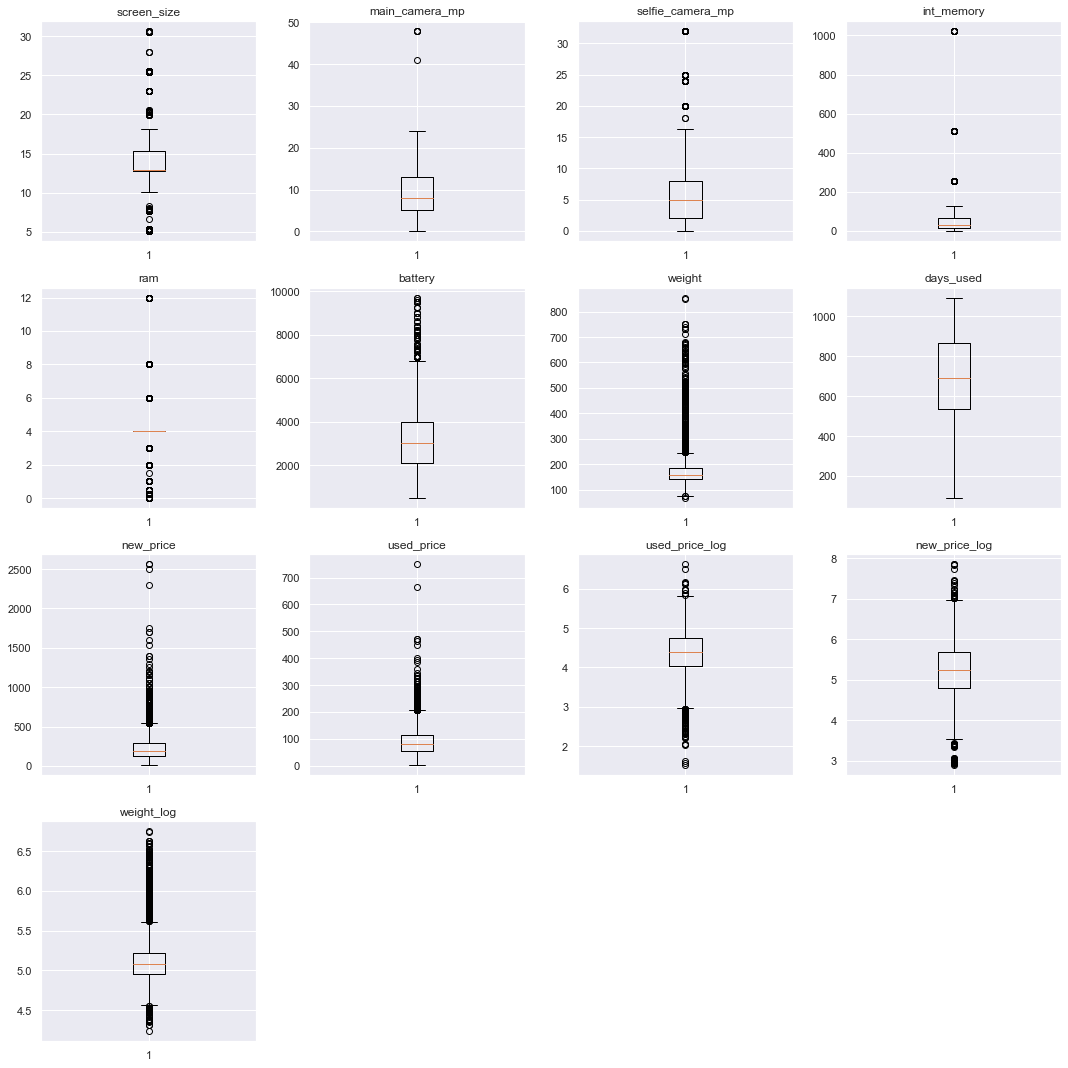

<IPython.core.display.Javascript object>

In [56]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

In [57]:
# let's check the statistical summary of the data once
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

### Data Preparation for modeling

- We want to predict the used device price, so we will use the normalized version `used_price_log` for modeling.
- We will drop the `device_category` column for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [58]:
# defining the dependent and independent variables
X = df1.drop(["used_price", "used_price_log", "device_category"], axis=1)
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  new_price_log  weight_log  
0        127     111.62       4.715100    4.983607  
1        325     249.39       5.519018    5.361292  
2        162     359.47      

<IPython.core.display.Javascript object>

In [59]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [60]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [62]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     263.6
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:00:18   Log-Likelihood:                 146.86
No. Observations:                2417   AIC:                            -191.7
Df Residuals:                    2366   BIC:                             103.6
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -47.40

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

**Observations**

- Both the R-squared and Adjusted R squared of our model are ~0.85, indicating that it can explain ~85% of the variance in the price of used phones.

- This is a clear indication that we have been able to create a very good model which is not underfitting the data.

- To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

**Let's check the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [63]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

<IPython.core.display.Javascript object>

In [64]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,25.616475,16.312729,18.565453


<IPython.core.display.Javascript object>

In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,24.15796,16.486945,19.304891


<IPython.core.display.Javascript object>

**Observations**

- RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.
- MAE indicates that our current model is able to predict used phone prices within a mean error of ~16.5 euros on test data.
- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- Despite being able to capture 85% of the variation in the data, the MAE is around 16.5 euros as it makes larger predictions errors for the extreme values (very high or very low prices).
- MAPE of ~19.3 on the test data indicates that the model can predict within ~19.3% of the used phone price.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [67]:
checking_vif(x_train1)

,feature,VIF
0,const,3.916761e+06
1,screen_size,7.872715e+00
2,main_camera_mp,2.305466e+00
3,selfie_camera_mp,2.878745e+00
4,int_memory,1.545834e+00
5,ram,2.307951e+00
6,battery,4.116221e+00
7,weight,2.053052e+01
8,release_year,5.073073e+00
9,days_used,2.663528e+00


<IPython.core.display.Javascript object>

**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [68]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [69]:
col_list = [
    "screen_size",
    "weight",
    "release_year",
    "new_price",
    "new_price_log",
    "weight_log",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.842978,0.231341
1,weight_log,0.842291,0.231847
2,screen_size,0.842218,0.231900
3,weight,0.838410,0.234682
4,new_price_log,0.805556,0.257436
5,new_price,0.765380,0.282784


<IPython.core.display.Javascript object>

In [70]:
col_to_drop = "release_year"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,3340.773271
1,screen_size,7.605790
2,main_camera_mp,2.288344
3,selfie_camera_mp,2.538605
4,int_memory,1.542415
5,ram,2.302771
6,battery,3.997310
7,weight,19.799733
8,days_used,1.942264
9,new_price,5.195041


<IPython.core.display.Javascript object>

In [71]:
col_list = ["screen_size", "weight", "new_price", "new_price_log", "weight_log"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight_log,0.840254,0.233339
1,screen_size,0.839686,0.233753
2,weight,0.837310,0.235480
3,new_price_log,0.805339,0.257580
4,new_price,0.764037,0.283592


<IPython.core.display.Javascript object>

In [72]:
col_to_drop = "weight_log"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,const,378.250534
1,screen_size,7.450165
2,main_camera_mp,2.287203
3,selfie_camera_mp,2.536821
4,int_memory,1.542286
5,ram,2.299414
6,battery,3.962766
7,weight,6.184132
8,days_used,1.924499
9,new_price,5.194306


<IPython.core.display.Javascript object>

In [73]:
col_list = ["screen_size", "weight", "new_price", "new_price_log"]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837310,0.235480
1,screen_size,0.835943,0.236467
2,new_price_log,0.801198,0.260305
3,new_price,0.758316,0.287010


<IPython.core.display.Javascript object>

In [74]:
col_to_drop = "weight"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,366.716124
1,screen_size,3.585322
2,main_camera_mp,2.177856
3,selfie_camera_mp,2.470830
4,int_memory,1.539197
5,ram,2.297571
6,battery,3.626953
7,days_used,1.845276
8,new_price,5.183942
9,new_price_log,7.014884


<IPython.core.display.Javascript object>

In [75]:
col_list = ["new_price", "new_price_log"]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,new_price_log,0.797819,0.262509
1,new_price,0.752255,0.290586


<IPython.core.display.Javascript object>

In [76]:
col_to_drop = "new_price_log"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  new_price_log


,feature,VIF
0,const,140.463203
1,screen_size,3.487605
2,main_camera_mp,1.984463
3,selfie_camera_mp,2.416036
4,int_memory,1.509779
5,ram,2.277804
6,battery,3.620424
7,days_used,1.800157
8,new_price,2.136778
9,brand_name_Alcatel,3.402897


<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [77]:
# initial list of columns
cols = x_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train5[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'new_price', 'brand_name_Celkon', 'brand_name_Micromax', 'brand_name_Nokia', 'brand_name_Spice', 'os_Others', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [78]:
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

<IPython.core.display.Javascript object>

In [79]:
olsmodel2 = sm.OLS(y_train, x_train6).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     734.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:00:21   Log-Likelihood:                -189.65
No. Observations:                2417   AIC:                             407.3
Df Residuals:                    2403   BIC:                             488.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7217    

<IPython.core.display.Javascript object>

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train6, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,40.895255,18.92785,20.897181


<IPython.core.display.Javascript object>

In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test6, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,26.916406,17.573028,20.959445


<IPython.core.display.Javascript object>

**Observations**

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variables.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [82]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.868850,0.218638
1525,4.448399,4.557748,-0.109348
1128,4.315353,4.270015,0.045337
3003,4.282068,4.246103,0.035965
2907,4.456438,4.542802,-0.086364


<IPython.core.display.Javascript object>

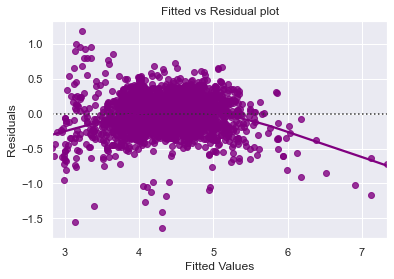

<IPython.core.display.Javascript object>

In [83]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

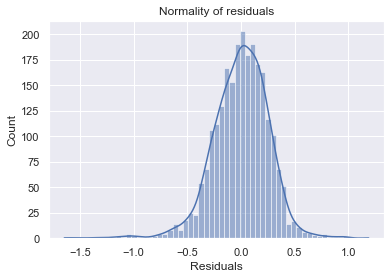

<IPython.core.display.Javascript object>

In [84]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals does have a slight bell shape.
- Let's check the Q-Q plot.

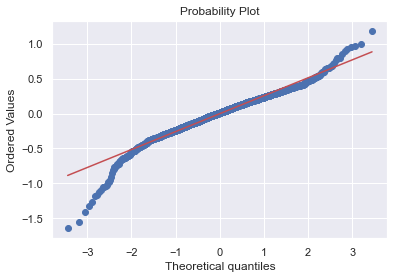

<IPython.core.display.Javascript object>

In [85]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [86]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9670044183731079, pvalue=4.0834602208747697e-23)

<IPython.core.display.Javascript object>

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [87]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train6)
lzip(name, test)

[('F statistic', 1.0559085197297342), ('p-value', 0.173645306519599)]

<IPython.core.display.Javascript object>

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model Summary

In [88]:
x_train_final = x_train6.copy()
x_test_final = x_test6.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     734.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:00:23   Log-Likelihood:                -189.65
No. Observations:                2417   AIC:                             407.3
Df Residuals:                    2403   BIC:                             488.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7217    

<IPython.core.display.Javascript object>

In [89]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,40.895255,18.92785,20.897181


<IPython.core.display.Javascript object>

In [90]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,26.916406,17.573028,20.959445


<IPython.core.display.Javascript object>

## Actionable Insights

- The model explains ~80% of the variation in the data and can predict within 17.6 euros of the used device price.


- The most significant predictors of the used device price are the price of a new device of the same model, the size of the devices screen, the resolution of the rear and front cameras, the number of days it was used, the amount of RAM, and the availability of 4G and 5G network.


- A unit increase in new model price will result in a 0.09% increase in the used device price. *[ 100 * {exp(0.0009) - 1} = 0.09 ]*


- A unit increase in size of the device's screen will result in a 5.76% increase in the used device price. *[ 100 * {exp(0.0560) - 1} = 5.76 ]*


- A unit increase in the amount of RAM will result in a 3.69% increase in the used device price. *[ 100 * {exp(0.0362) - 1} = 3.69 ]*

## Recommendations

- The model can predict the used device price within ~21%, which is not bad, and can be used for predictive purposes.


- ReCell should look to attract people who want to sell used phones and tablets which have not been used for many days and have good front and rear camera resolutions.


- Devices with larger screens and more RAM are also good candidates for reselling to certain customer segments.


- They should also try to gather and put up phones having a high price for new models to try and increase revenue.
    - They can focus on volume for the budget phones and offer discounts during festive sales on premium phones.


- Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different segments.


- ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.